---
title: "Exploring Data"
format: 
    html:
        code-fold: true
---

## Exploratory data analysis(EDA)
Exploratory data analysis is an useful approach to analyze and visualize the data. Analysts can use EDA to find trends, gather summary of statistics, and make a representation of graphics. 

In my project, I plan to use the data I cleaned previously to do EDA in order to gather some summaries of datasets. 

For twitter dataset I gathered from python, I plan to make visualizations of frequencies of words in order to get a first insight of attitudes of consumers. I plan to make a histogram of top 20 words with the highest frequencies and make a wordcloud of the bag of words. From these plots, you can find the most frequent words directly and have the first assumptions of consumers' attitudes. 

For twitter dataset I gathered from R, I also plan to make visualizations of frequencies of words to calculate he social platform popularities. More than this, It can also provide feedbacks about the consumers revies of each social platforms. 

For Modified data, I have two datasets which are instagram influencers dataset and advertising dataset. I will first explore the variables and understand what each variables mean then deeper make a visualization in order to gather some useful information. 

##### Import required packages

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Part 1 Twitter API in Python

In this part, three datasets are being used: word frequency dataset (wordfreqpython.csv), sentiment scorre dataset(pytweetscore.csv) and sentiment result dataset(pytweetresult.csv)

First, I want to gather the histogram of word of frequencies to take a first glimpse of the result. 

Next, the wordcloud of the frequencies can bring us a lot of information of the consumers' attitudes. 

I will also calculate the distribution of attitudes(neg,pos,neu) in order to summary the components of consumers' attitudes about social platform. 

#### Import required dataset

According to this dataframe, 


words: name of the count words


counts: frequencies that each word appears

In [2]:
tweetfreq = pd.read_csv("../data/01-modified-data/wordfreqpython.csv")
tweetfreq.head()

,Unnamed: 0,words,counts
0,52,zfnumberifvzdbnumber,616
1,519,zero,615
2,546,year,614
3,344,xpipnumberunumbergm,613
4,366,wsbchairman,612


<AxesSubplot:xlabel='words', ylabel='counts'>

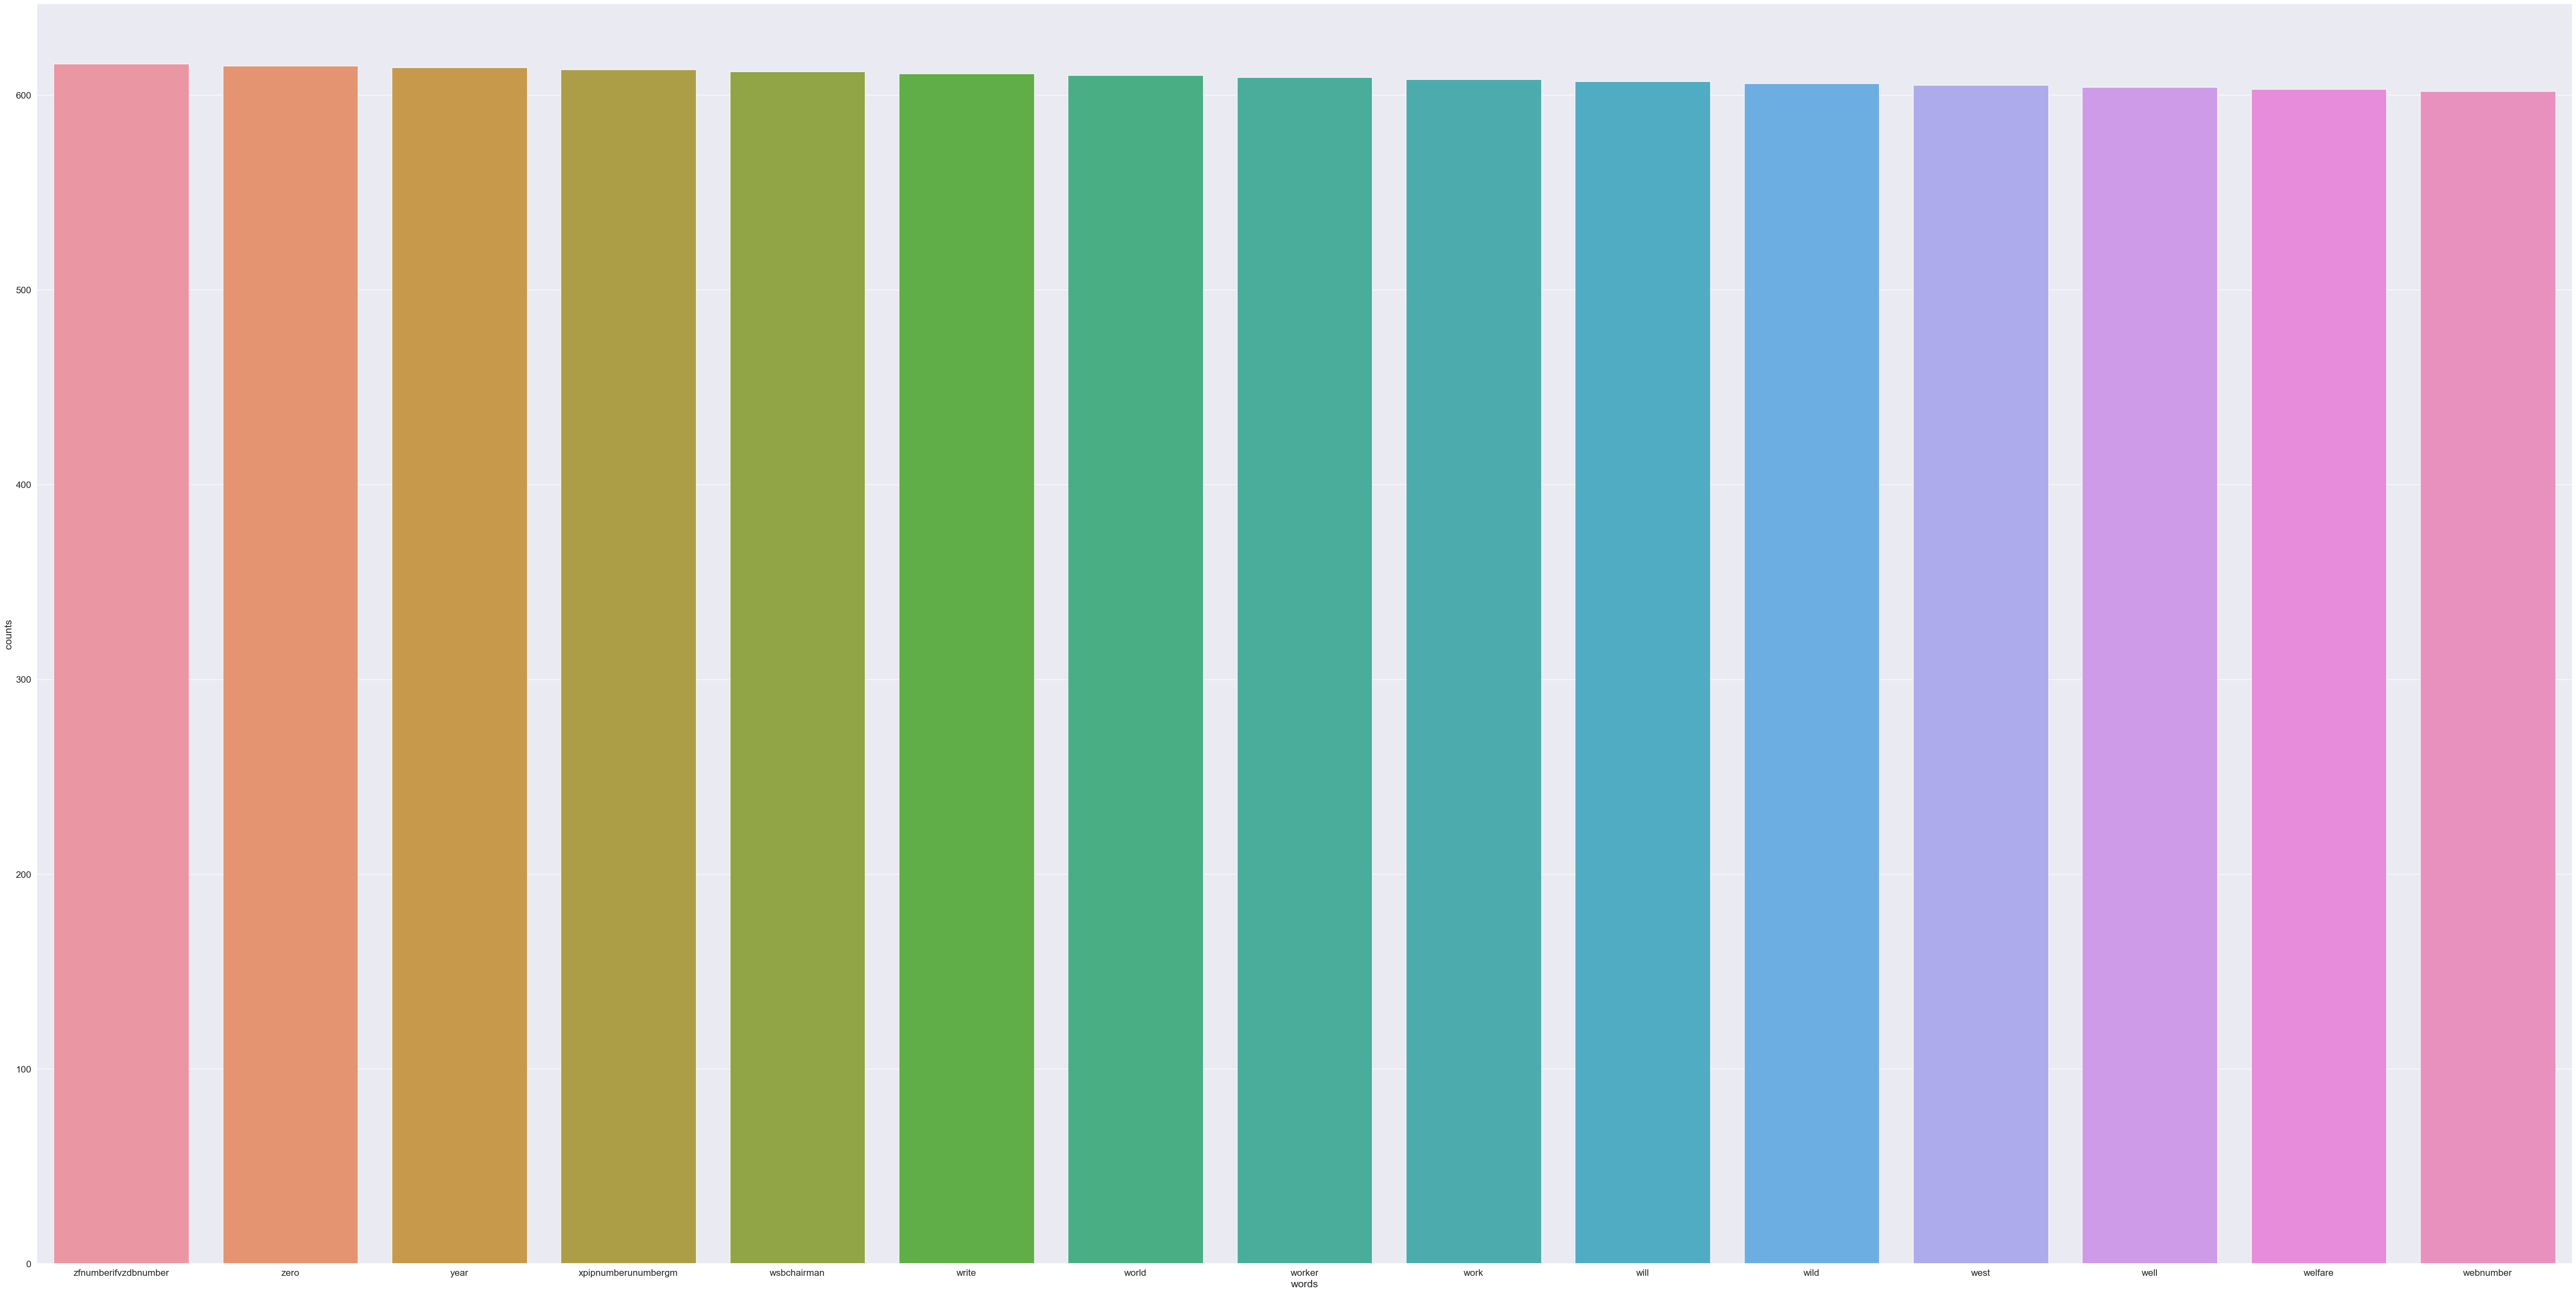

In [3]:
data = tweetfreq.sort_values(by=['counts'],ascending=False)#sort the dataset
data = data.head(15)#subset the dataset
sns.set(rc = {'figure.figsize':(80,40)})#set plot size
sns.set(font_scale=1.5)#set font size
sns.barplot(x=data.words,y=data.counts)#use bar plot to plot the 10 most frequency words

As we can see in the plot, there are a lot of words with no meaning, so we need to remove a lot of unnecessary words in order to support our result. At that time, I decide to use wordcloud in order to show the results clearly. 

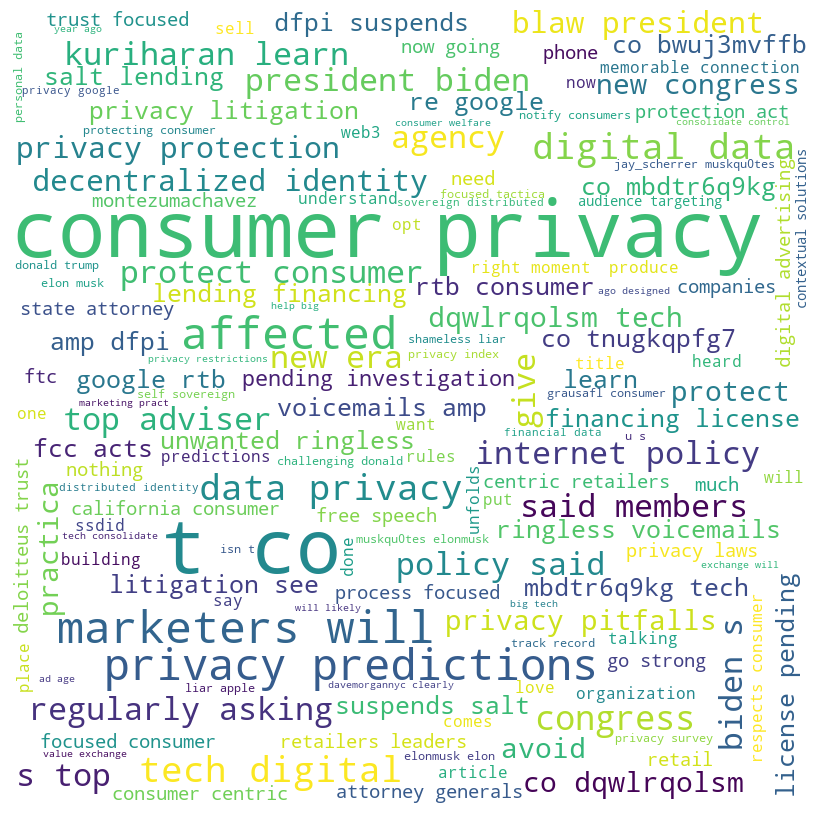

In [4]:
df = pd.read_csv("../data/00-raw-data/twitterpython.csv")
 
comment_words = ''
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['https', 'rt']#remove stop words
stopwords = set(stop_words + custom_stop_words)
 
# iterate through the csv file
for val in df.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


Based on the wordcloud, We can clearly see the main attitude for consumer privacy is focused on privacy protection. "Affected", "privacy protection" "internet policy", "privacy pitfalls", "protect consumers" appeared frequently based on twitter reviews from users. 

Nowadays, with the popularity of big data, privacy have an incresingly dangerous situation to be leaked. Consumers is now focusing on how to protect privacy themselves and leave a lot of comments about that. 

##### Sentiment Analysis in Python

Through the data cleaning tab, I used sentiment analysis to clean the text datasets and classified each sentence. At this time, I plan to plot the results by using matplotlib and seaborn. 

I plan to calculate the frequencies of each attitude(pos neg neu)

##### Load the required datasets

In [5]:
tweetscore = pd.read_csv("../data/01-modified-data/pytweetscore.csv")
tweetresult = pd.read_csv("../data/01-modified-data/pytweetresult.csv")

In [6]:
tweetscore.head()

,Unnamed: 0,text,neg,neu,pos,compound
0,0,A more memorable connection is one that respec...,0.000,0.846,0.154,0.4588
1,1,A more memorable connection is one that respec...,0.000,0.846,0.154,0.7184
2,2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,0.081,0.796,0.123,0.0846
3,3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,0.102,0.766,0.132,-0.0881
4,4,@DanKnightMMA Dear Dan - you seem like an enga...,0.081,0.769,0.151,0.6461


In [7]:
tweetresult.head()

,Unnamed: 0,text,result,scores
0,0,A more memorable connection is one that respec...,Positive,15.4
1,1,A more memorable connection is one that respec...,Positive,15.4
2,2,RT @OkeyMor57: @jay_scherrer @muskQu0tes @elon...,Negative,24.2
3,3,@jay_scherrer @muskQu0tes @elonmusk Elon Musk ...,Negative,14.0
4,4,@DanKnightMMA Dear Dan - you seem like an enga...,Positive,26.0


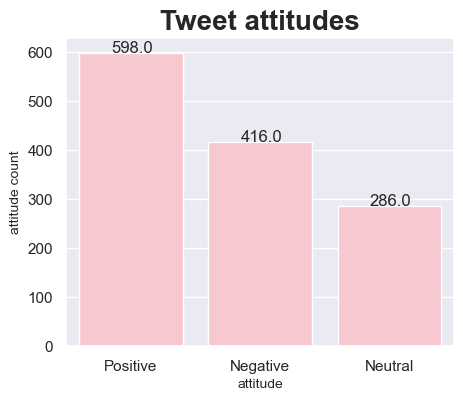

In [8]:
sns.set(rc={'figure.figsize':(5,4)})
hist1 = sns.countplot(tweetresult.result,color = "pink")#create a histram of attitudes count
for p in hist1.patches:
   hist1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))#give each bin a number to visulise clearly

hist1.set_title("Tweet attitudes",fontdict= { 'fontsize': 20,'fontweight':'bold'})#set title
hist1.set_xlabel("attitude",fontdict= { 'fontsize': 10})#set x label
hist1.set_ylabel("attitude count",fontdict= { 'fontsize': 10})#set y label
plt.show()

Now I want to use pie chart to clear show the distribution of each attitude.

Text(0.5, 1.0, 'Tweet attitudes')

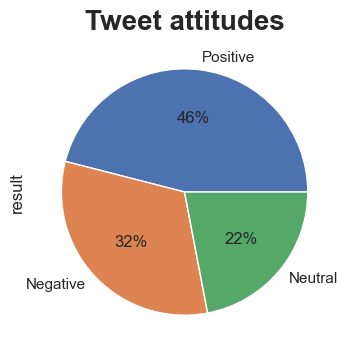

In [9]:
pie1 = tweetresult.result.value_counts().plot(kind = "pie",autopct='%1.0f%%') #create pie plot
pie1.set_title("Tweet attitudes",fontdict= { 'fontsize': 20,'fontweight':'bold'}) #set title

Through this plot, we can clearly see the count of different attitudes through the plot. As we can see, most users have positive attitude on customer privacy, there are 598 comments can be tagged as postive, But there are still a lot of users have neutural and negative attitudes of customer privacy. there are 416 comments tagged as negative, 286 comments tagged as neutral. 46% positive comments from all of the comments. 32% negative comments from all of the comments, 22% neutral comments from all of the comments. 

##### Conclusion

Based on the plots generated from frequencies of twitter datasets. We can see most consumers remain positive attitudes through the consumer privacy in the big data society. Most consumers focus on how to protect their consumer privacies and take more notice on government policies of protection og privacy. However, there still 32% consumers remain negative attiudes about consumer privacy. Through the wordcloud, there are still some nagative words and phrases like "privacy pitfall", "stop", "affect", "unwarranted". Government should takes action to process consumers' review. 

More than this, social media companies should not only focus on benefits earned from big data society, they need to take action to protect consumers' privacy. Nowadays, there are a lot of cases about "credit card fraud", "internet fraud". People can easily generate the privacy from others like phone number, address, or even credit card number. We need to ensure within the rapid progress of development of big data society, consumer privacies need to be carefully protected in order to prevent huge loss. 

## Twitter API in R

For twitter dataset I gathered from R, I also plan to make visualizations of frequencies of words to calculate he social platform popularities. More than this, It can also provide feedbacks about the consumers revies of each social platforms. 

At this time, I still want to use wordcloud to compare platforms mentioned in twitter in order to make my results more straightforward and easier to understand.

##### Load required packages

In [1]:
library(selectr)
library(rvest)
library(xml2)
library(wordcloud2) # for generating really cool looking wordclouds
library(tm) # for text minning
library(dplyr) # loads of fun stuff including piping
library(ROAuth)
library(jsonlite)
library(httpuv)
library("tm")
library("SnowballC")
library("wordcloud")
library(wordcloud)
library("RColorBrewer")
suppressWarnings(expr)#ignore warning
options(warn=-1)

Loading required package: NLP


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer



function (expr) 
{
    enexpr(expr)
}
<bytecode: 0x7fa893a25128>
<environment: namespace:rlang>

##### Load the required dataset

In [2]:
d <- read.csv("../data/00-raw-data/twittertm.csv")
head(d)

,X,word,freq
,<chr>,<chr>,<int>
1,tik,tik,166
2,tok,tok,162
3,and,and,140
4,brand,brand,90
5,she,she,90
6,wearing,wearing,90


From the head of dataframe, the tik-tok are considered as the most frequent words. Next, we can generate a wordcloud about the whole bag of words. These dataset can help us indicate which kind of social media platform is more popular and being discussed more. 

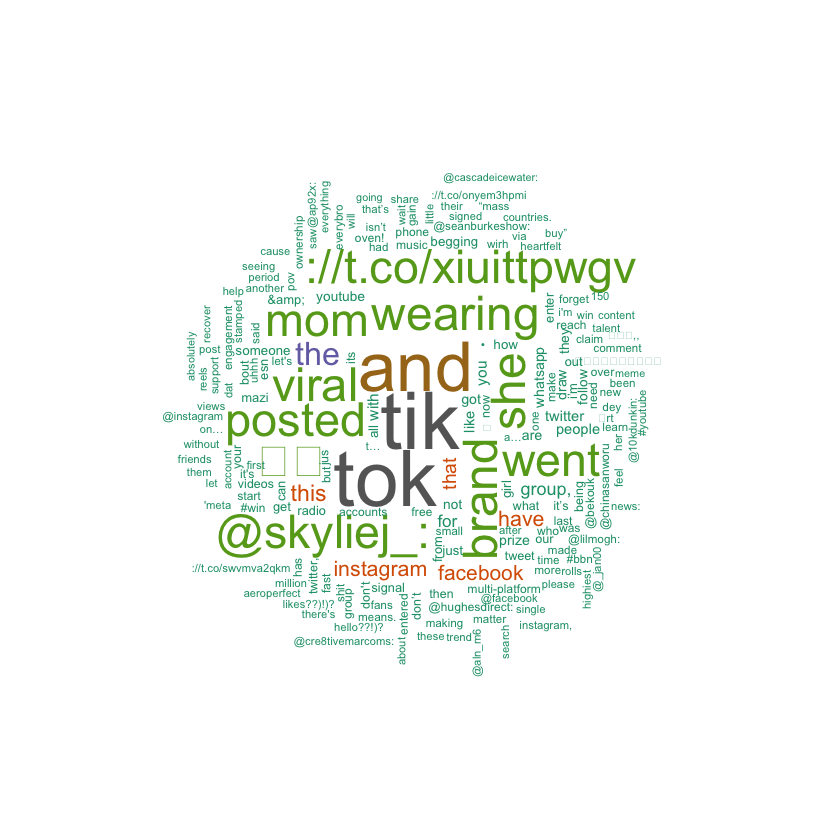

In [3]:
#Gather a wordcloud

wordcloud(words = d$word, 
          freq = d$freq,
          min.freq = 1, 
          max.words = 200,
          random.order = FALSE, 
          rot.per = 0.35, 
          colors = brewer.pal(8, "Dark2"),
          widgetsize =c("1000","1000"))

As We can see in the plot, the frequency of "tik-tok" is far higher than other words. Nowadays, tik-tok is one of the most popular platforms for internet influencers. More than this, "instagram" and "facebook" also show frequently. 

## Part 3 Instgram Influencer dataset

##### Data Introduction
Instagram is very popular nowadays among the world. People in different countries like to use this media platform to share their lives, post some exciting moments and connect with their families and friends. There are some instagram influencers can use the platform to gather likes from their fans, use their popularity to promote some advertisements in order to gain benefits from instagram. This dataset talks about how to measure the influence score among influencers. Here are the column introduction for this dataset. 
    
    channel info: Username in instagram

    influence score: It is calculated based on their popularity.

    posts: total posts they have

    followers: total followers they have

    avg_likes: average likes of their total posts

    60_days_eng_rate: 60 days of engagement rate

    new_post_avg_like: a calculation of the average likes they gained from new posts. 

    total_likes: total likes of their posts in instagram.

    country: users' origin. What countries they from?

From this dataset, I plan to explore the following:

1. Utilize a pie chart to discuss the country distribution of famous instagram influencers. 
2. Since different factors have different relationship to influence score, I plan to use scatterplot to visualize relationship between each factor to influence scores. 
3. From the step2, I want to further discuss the most important factor and further visualize this factor. 

In [2]:
insta = pd.read_csv('../data/01-modified-data/instagram_infl.csv')
insta.head()

,Unnamed: 0,rank,channel_info,influence_score,posts(k),followers(m),X60_day_eng_rate(%),new_post_avg_like(m),total_likes(b),country,avg_likes
0,1,1,cristiano,92,3.30,475.8,1.39,6.5,29.0,Spain,8700000.0
1,2,2,kyliejenner,91,6.90,366.2,1.62,5.9,57.4,United States,8300000.0
2,3,3,leomessi,90,0.89,357.3,1.24,4.4,6.0,Undefined,6800000.0
3,4,4,selenagomez,93,1.80,342.7,0.97,3.3,11.5,United States,6200000.0
4,5,5,therock,91,6.80,334.1,0.20,665.3,12.5,United States,1900000.0


Firstly, I want to plot the distribution of instagram influencers' countries in order to further discuss what countries influencers are more popular among the world.

Text(0.5, 1.0, 'Country distribution among internet influencers')

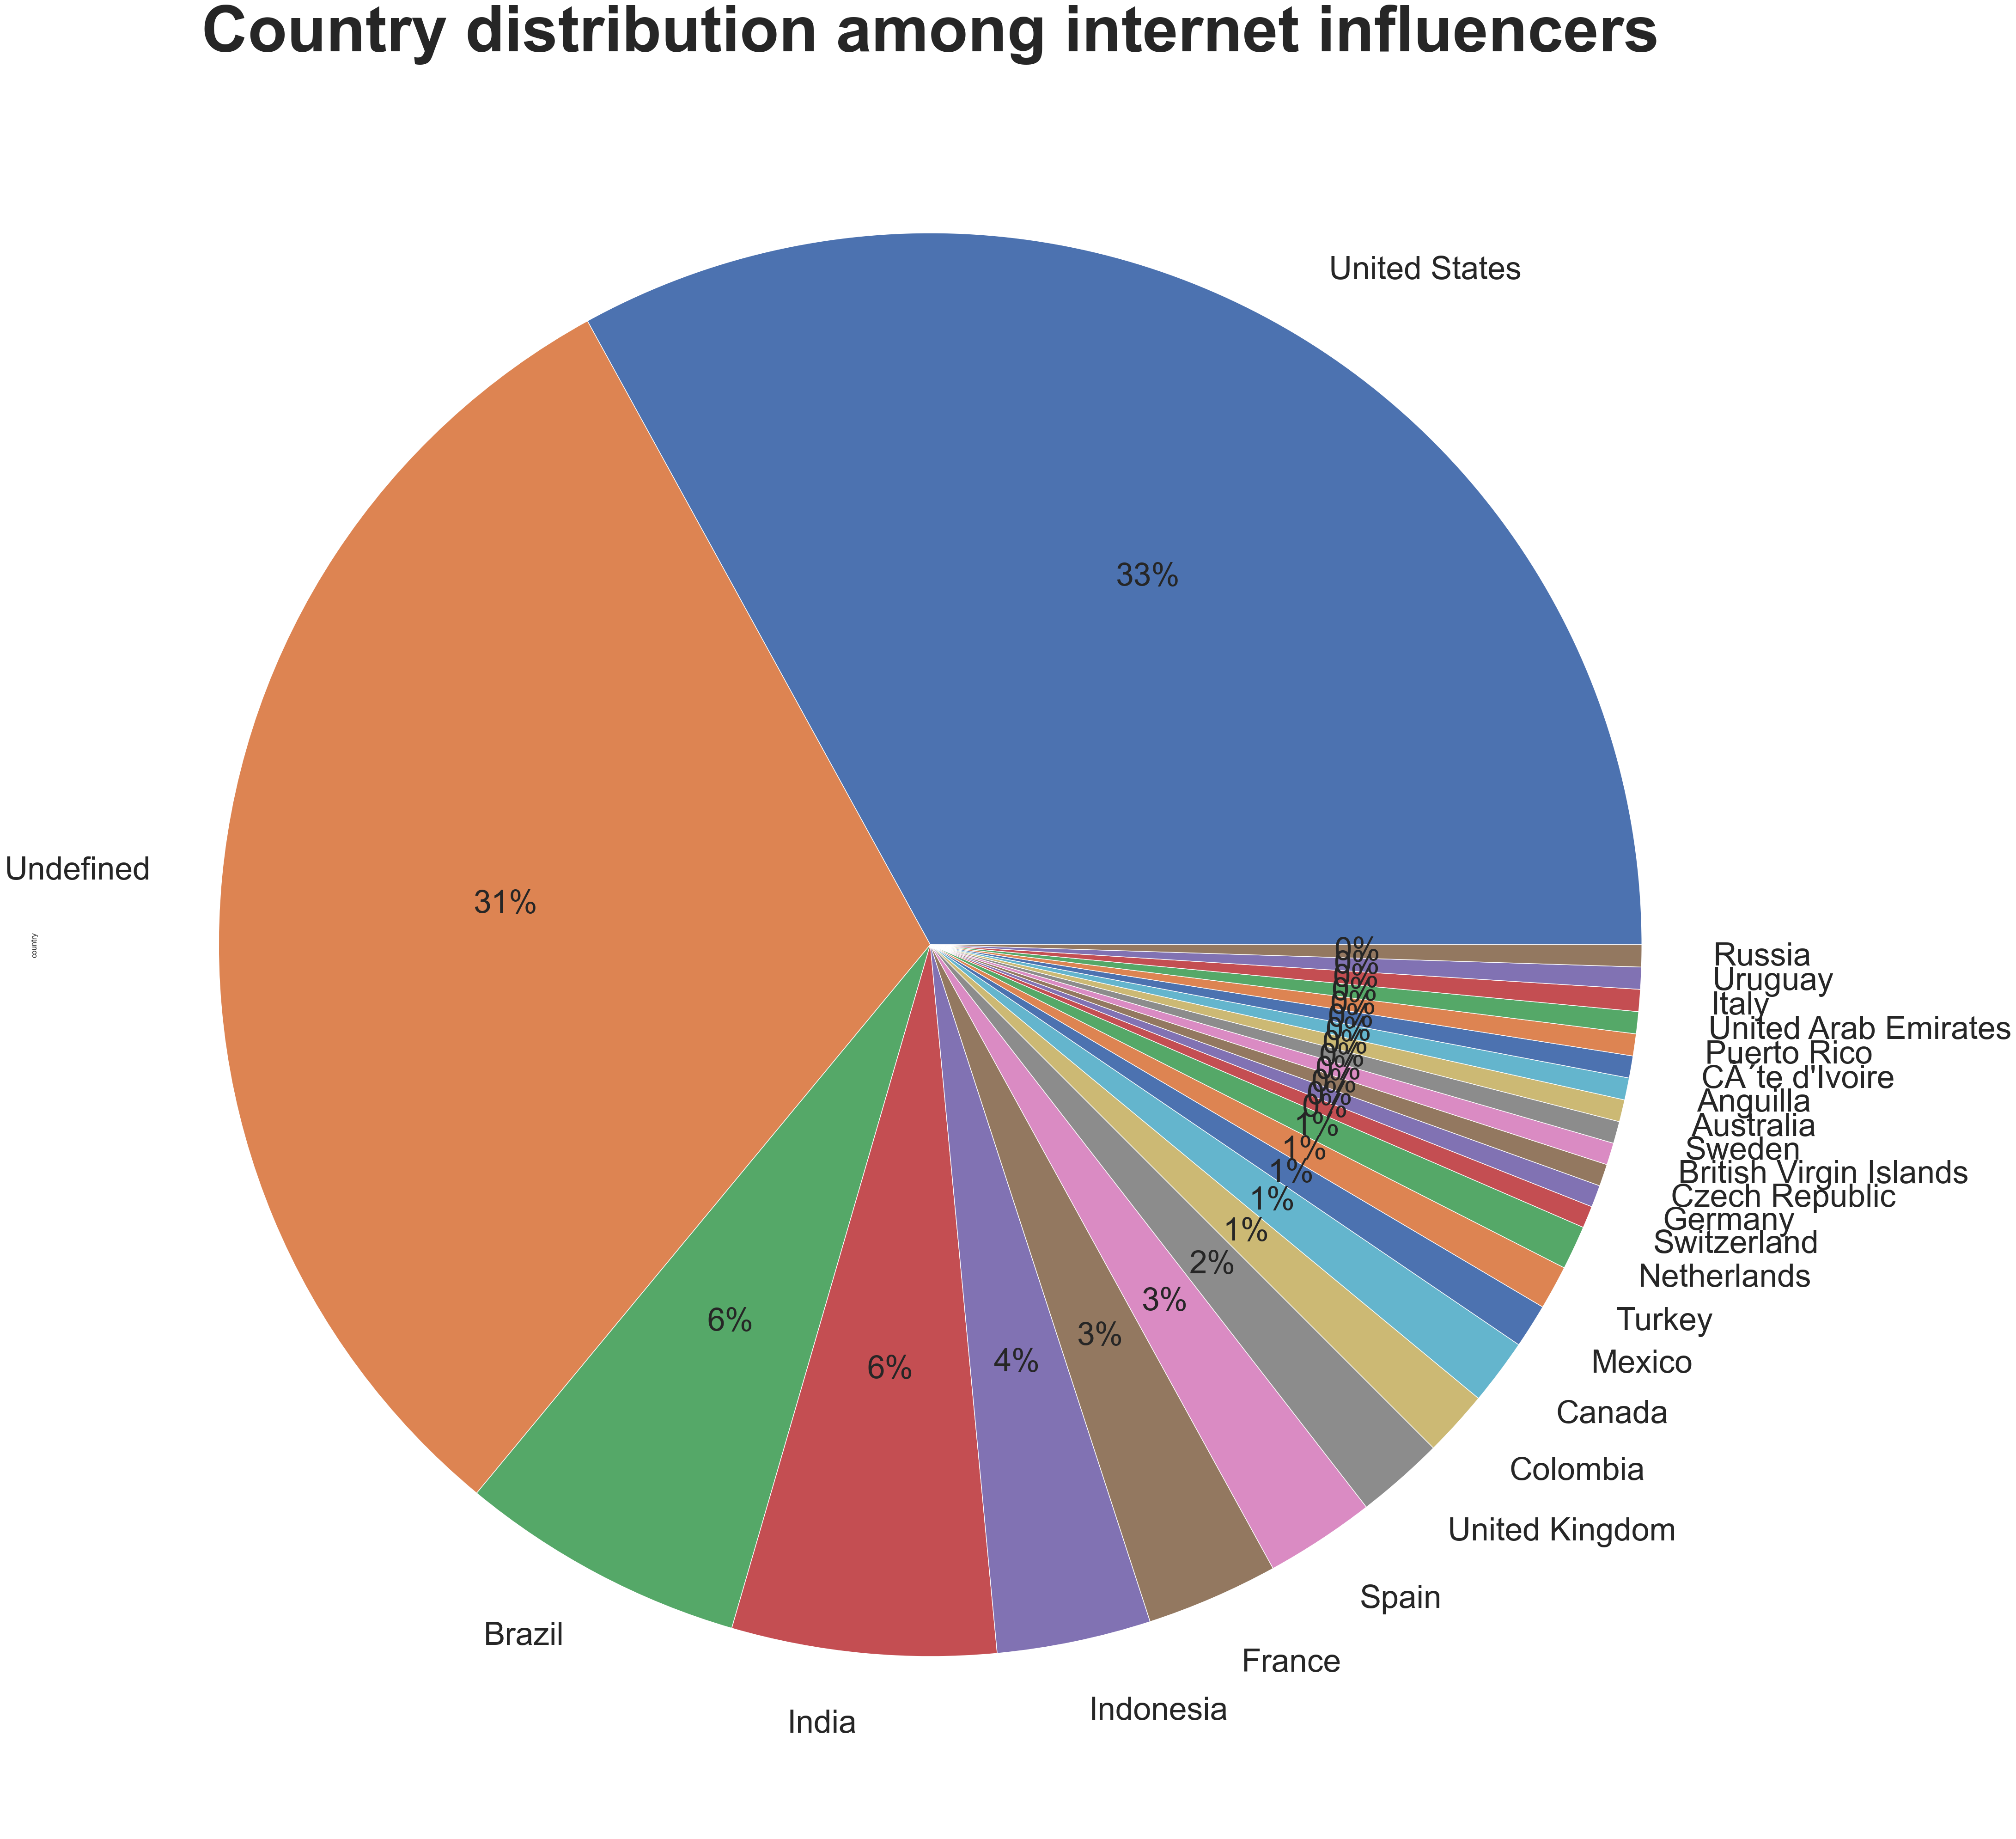

In [17]:
sns.set(rc={'figure.figsize':(50,50)})
pie = insta.country.value_counts().plot(kind='pie',autopct='%1.0f%%',textprops={'fontsize': 50})#Use pieplot the distribution of countries
pie.set_title("Country distribution among internet influencers",fontdict= { 'fontsize': 100,'fontweight':'bold'}) #set title for this plot


As the plot shows, the United States has the most instagram influencer among the world. There are a lot of instagram influencers without defined country region. As a result, this conclusion may be not accurate enough to conclude that the United States has the most instagra influencer among the world. 

Then I want to find the relationship between the influence score and different factors. In my project, I totally curious about what factors make an internet influencer success. At that time, I want to compare influence score with average likes, total posts and followers. 

Text(0, 0.5, 'posts(1000)')

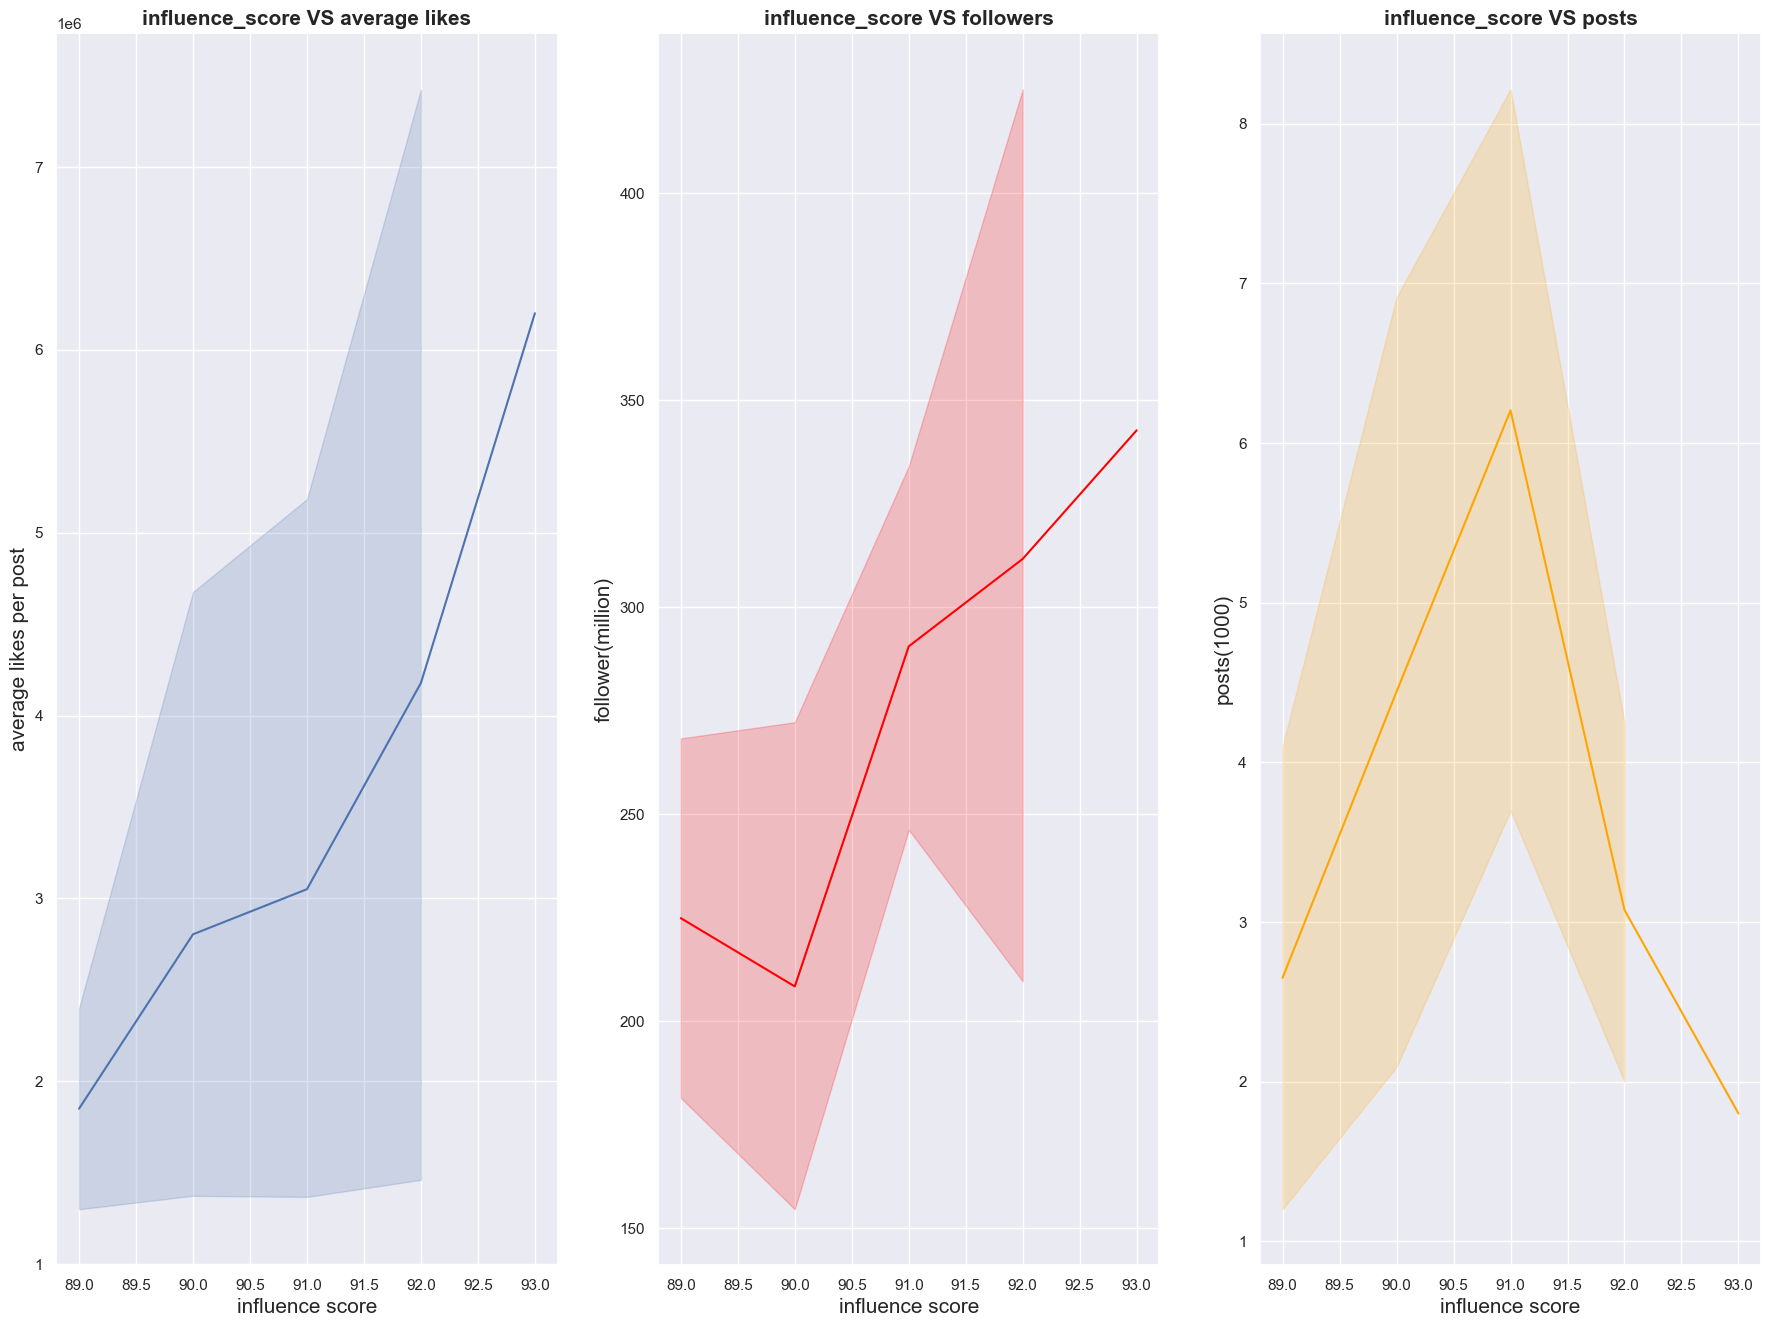

In [5]:
data = insta.sort_values(by = ['influence_score'], ascending= False)#Sort data with infleunce score
data = data.head(20)#subset data with top 20 infleuncers with high influence score
sns.set(rc={'figure.figsize':(22,16)})
sns.set(font_scale=1)#set font size
f, axes = plt.subplots(1, 3)# plot the factors' plots toegther in order to gain better comparison
lineplot1 = sns.lineplot(y = data.avg_likes,x = data.influence_score,ax=axes[0])#plot lineplot
lineplot1.set_title("influence_score VS average likes",fontdict= { 'fontsize': 15,'fontweight':'bold'})#set title foor the plot
lineplot1.set_xlabel("influence score",fontdict={"fontsize":15})#set xlabel
lineplot1.set_ylabel("average likes per post",fontdict={"fontsize":15})#set y label
lineplot2 = sns.lineplot(y = data['followers(m)'],x = data.influence_score,color='red',ax=axes[1])
lineplot2.set_title("influence_score VS followers",fontdict= { 'fontsize': 15,'fontweight':'bold'})#set title
lineplot2.set_xlabel("influence score",fontdict={"fontsize":15})#set xlabel
lineplot2.set_ylabel("follower(million)",fontdict={"fontsize":15})#set y label
lineplot3 = sns.lineplot(y = data['posts(k)'],x = data.influence_score,color='orange',ax=axes[2]) #plot lineplot
lineplot3.set_title("influence_score VS posts",fontdict= { 'fontsize': 15,'fontweight':'bold'})#set title
lineplot3.set_xlabel("influence score",fontdict={"fontsize":15})#set xlabel
lineplot3.set_ylabel("posts(1000)",fontdict={"fontsize":15})#set y label

Compare with these three plots, we can most relevant factor is average likes for each post. The second is followers. At that time, we can conclude that the most important factor to become a success internet influencer is to attract audiences in order to earn more postivie interactions like likes and with the average likes, We will gain more followers. No matter how much posts, the quality of post is the most important. 

As we can see, interactions play one of the most important factors for internet influencer, I want to predict the popularity of influencers and predict their popularity in the future. Since ad salers need to enlarge their benefits so that they need to take a survey of internet influencers' capacities and influence score. At this time, I decided to use 60days engage rate and new average like post to predict the popularity among these instagram influencers. 

Text(0, 0.5, 'channel names')

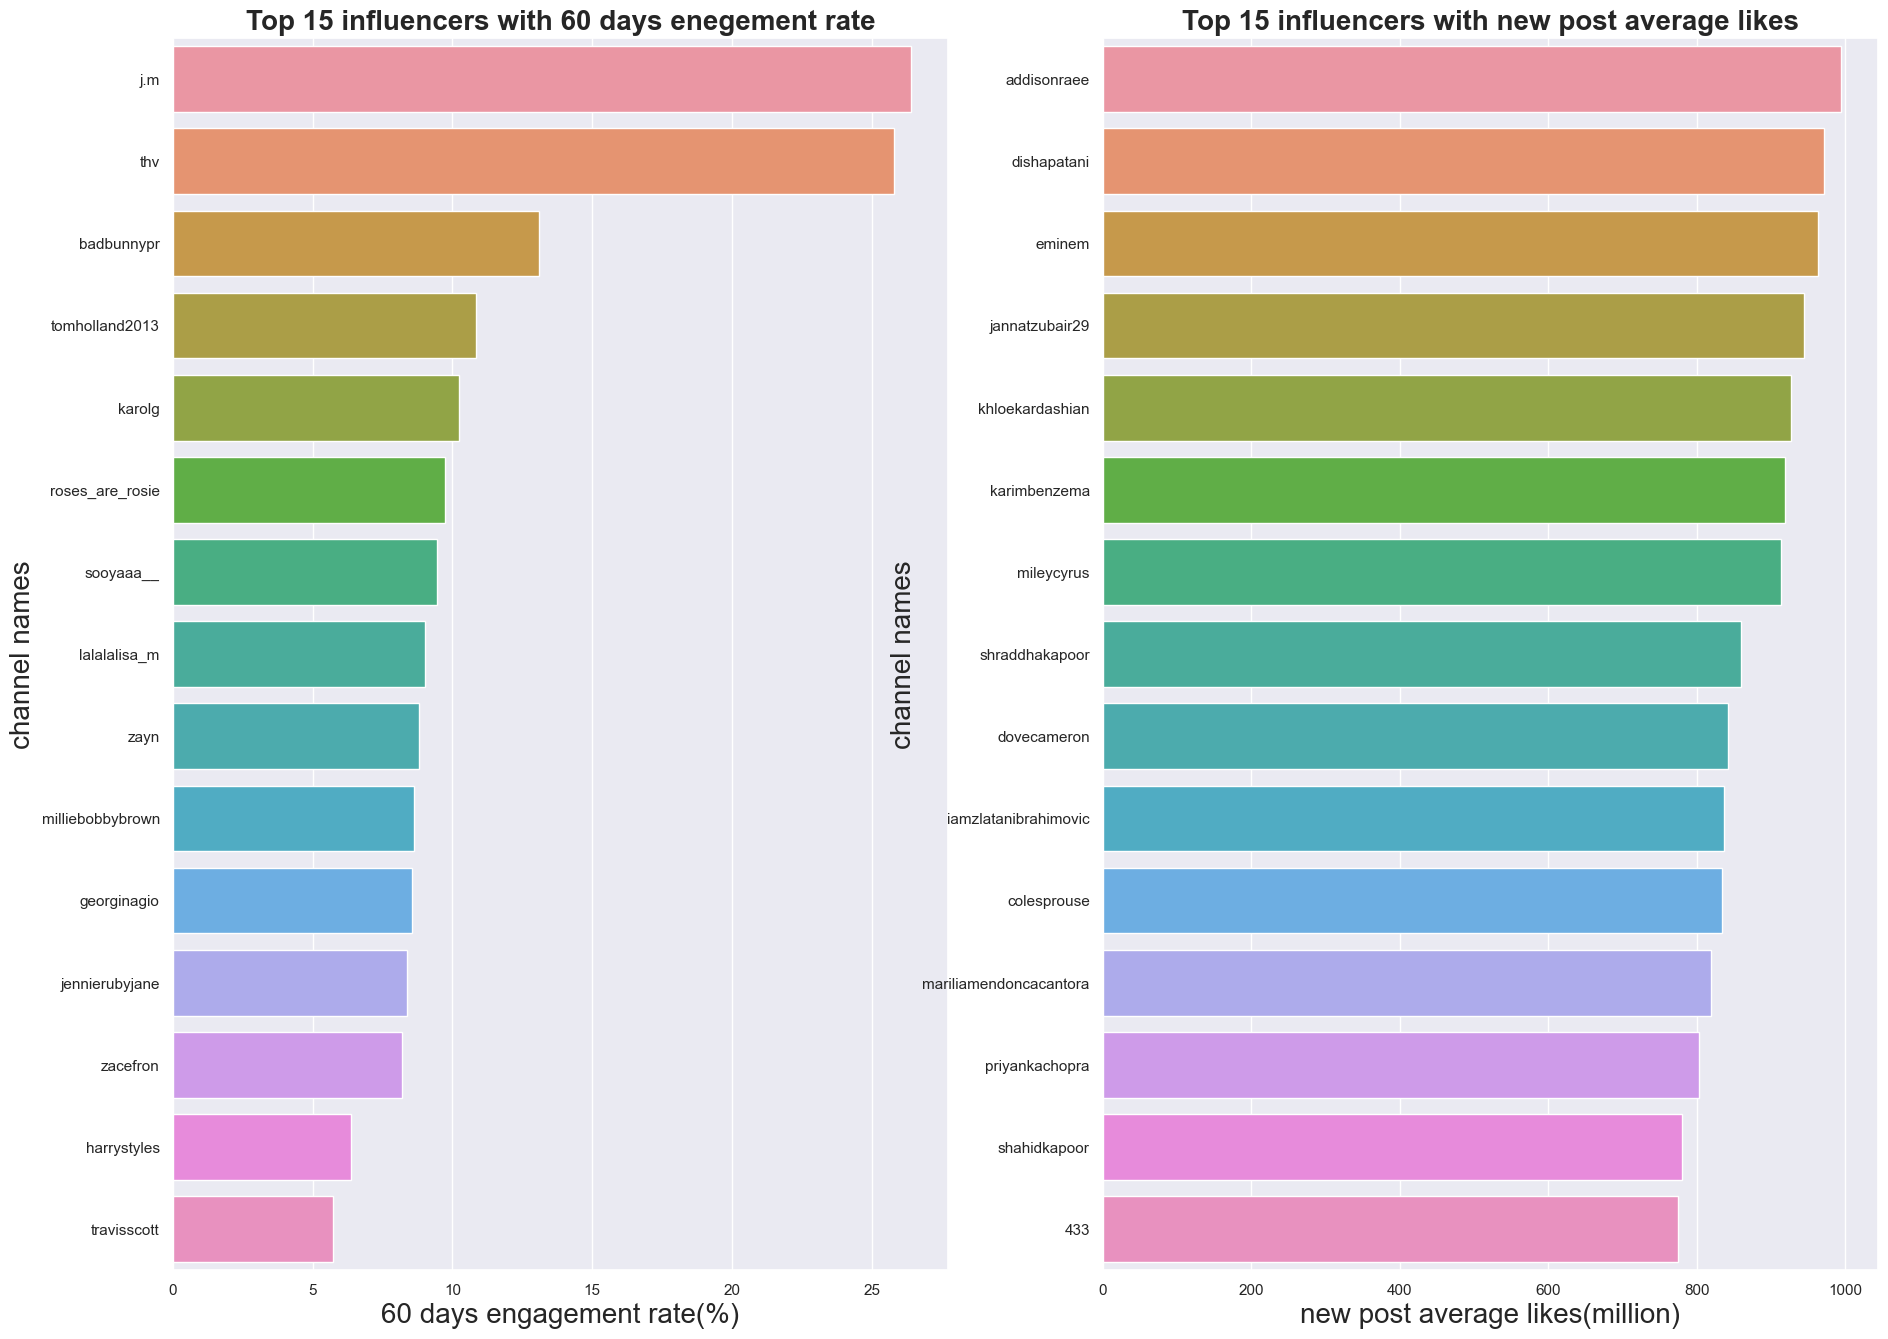

In [7]:
data = insta.sort_values(by = ['X60_day_eng_rate(%)'], ascending= False)#Sort data with 60 day engagement rate
data = data.head(15)#subset data with top 15 infleuncers with high influence score
f, axes = plt.subplots(1, 2)# plot the factors' plots toegther in order to gain better comparison

barplot1 = sns.barplot(y=data["channel_info"], x = data['X60_day_eng_rate(%)'],ax=axes[0])#create the barplot with 60 day engagement rate
barplot1.set_title("Top 15 influencers with 60 days enegement rate",fontdict= { 'fontsize': 20,'fontweight':'bold'})#set title
barplot1.set_xlabel("60 days engagement rate(%)",fontdict= { 'fontsize': 20})#set xlabel
barplot1.set_ylabel("channel names",fontdict= { 'fontsize': 20})#set y label
data1 = insta.sort_values(by = ['new_post_avg_like(m)'], ascending= False)#Sort data with new post average likes
data1 = data1.head(15)#subset data with top 15 infleuncers with high new post average likes
barplot2 = sns.barplot(y=data1["channel_info"], x = data1['new_post_avg_like(m)'],ax=axes[1])#create the barplot with new post average likes
barplot2.set_title("Top 15 influencers with new post average likes",fontdict= { 'fontsize': 20,'fontweight':'bold'})#set title
barplot2.set_xlabel("new post average likes(million)",fontdict= { 'fontsize': 20})#set x label
barplot2.set_ylabel("channel names",fontdict= { 'fontsize': 20})#set y label

As we can see in the two plots, there are few similar channel names between these two plots. But ad salers can use these two plot to compare influencers in order to gain their benefits. 

##### Conclusion
The EDA of this dataset can provide us which factor is the most important part for advetising companies. Interaction plays the most important role to define influencer score. Nowadays, Engagement rate is the most direct way to calculate the popularity of the certain instagram influencers. 

## Advertising dataset

##### Data Introduction 
Advertisements is one of the important sources for internet influencers to earn benefits and money from social media platforms. In this dataset, we will work on an advertising dataset. There are many features to determine whether internet users will click on advertisements. 


    This datasets contain these columns:


    Daily Time Spent on Site: internet users' time consumptions on site in minutes


    Age: Internet users' ages in years


    Area Income: Internet users' average incomes in geographical area


    Daily Internet Usage: Daily average internet time consumptions of internet users in minutes


    Ad Topic Line: Headline of the advertisement


    City: City of consumer


    Male: Whether or not consumer was male


    Country: Country of consumer


    Timestamp: Time at which consumer clicked on Ad or closed window


    Clicked on Ad: 0 or 1 indicated clicking on Ad

##### Preprocess the dataset and EDA

Input the advertising dataset and drop the nonnumeric column. 

In [9]:
adv = pd.read_csv("../data/01-modified-data/advertising.csv")
adv = adv.select_dtypes(['number'])
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Firstly explore datasets, find whether there are some NA values in the datasets, if yes, drop the NA values. 

Then do EDA with datasets, make some visualization plots and first analyze the datasets.

In [10]:
adv.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [11]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [12]:
adv.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

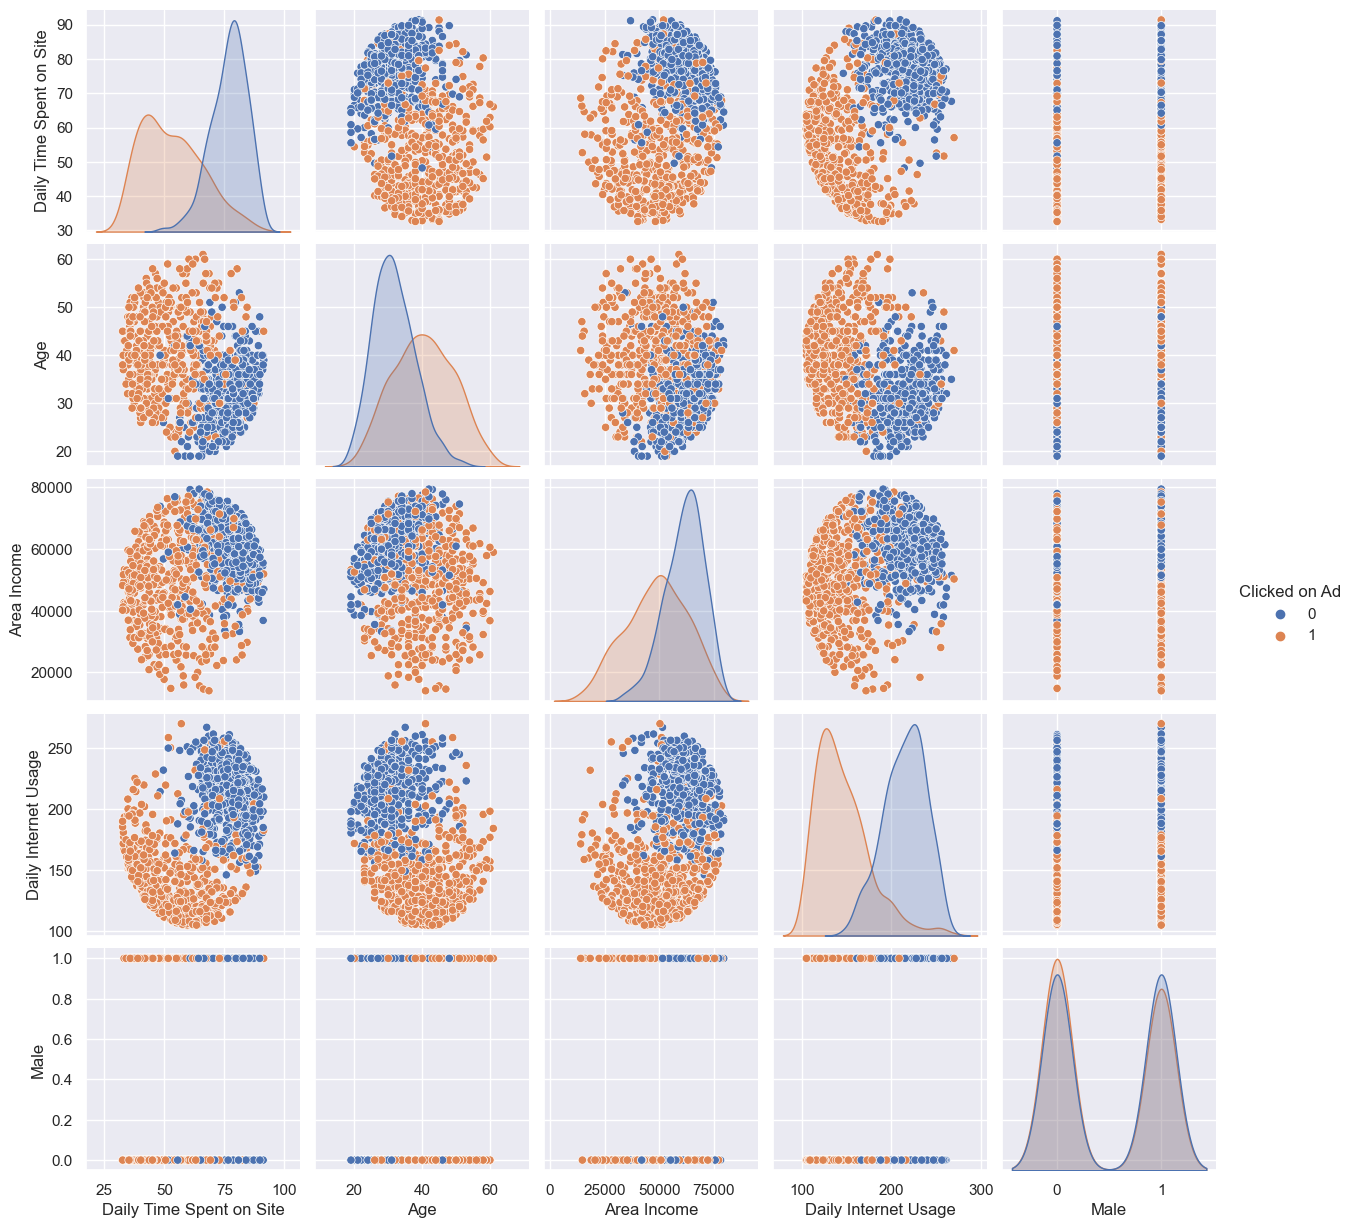

In [13]:
sns.pairplot(data=adv,hue='Clicked on Ad')

Here is the pairplot shows the relationship between each columns, and the clustering of whether internet users clicked on advertisements. We can take a instinct insight of datasets.